In [1]:
import numpy as np
import pandas as pd

In [2]:
data_baseball = pd.read_csv('./data/baseball.csv')

In [3]:
data_baseball.shape

(1232, 15)

In [4]:
data_baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


# Modelo de Aprendizaje Decision Tree

In [5]:
cols_to_use = ["Team", "RS", "RA", "W", "OBP", "SLG", "BA", "Playoffs"]

In [6]:
data = data_baseball[cols_to_use]

In [7]:
data.head()

,Team,RS,RA,W,OBP,SLG,BA,Playoffs
0,ARI,734,688,81,0.328,0.418,0.259,0
1,ATL,700,600,94,0.320,0.389,0.247,1
2,BAL,712,705,93,0.311,0.417,0.247,1
3,BOS,734,806,69,0.315,0.415,0.260,0
4,CHC,613,759,61,0.302,0.378,0.240,0


In [8]:
data.isnull().values.any()

False

In [9]:
data.shape

(1232, 8)

In [10]:
features = data[["RS", "RA", "W", "OBP", "SLG", "BA"]]

In [11]:
labels = data["Playoffs"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

In [14]:
X_train.shape

(924, 6)

In [15]:
X_test.shape

(308, 6)

In [16]:
y_train.shape

(924,)

In [17]:
y_test.shape

(308,)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

In [20]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_predict = DecisionTreeModel.predict(X_test)

In [23]:
accuracy_score(y_test, y_predict)

0.9090909090909091

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='./output/simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['No playoffs','Playoffs'],filled=True)

In [25]:
from subprocess import call
call(['dot', '-T', 'png', './output/simple_tree.dot', '-o', './output/simple_tree.png'])

0

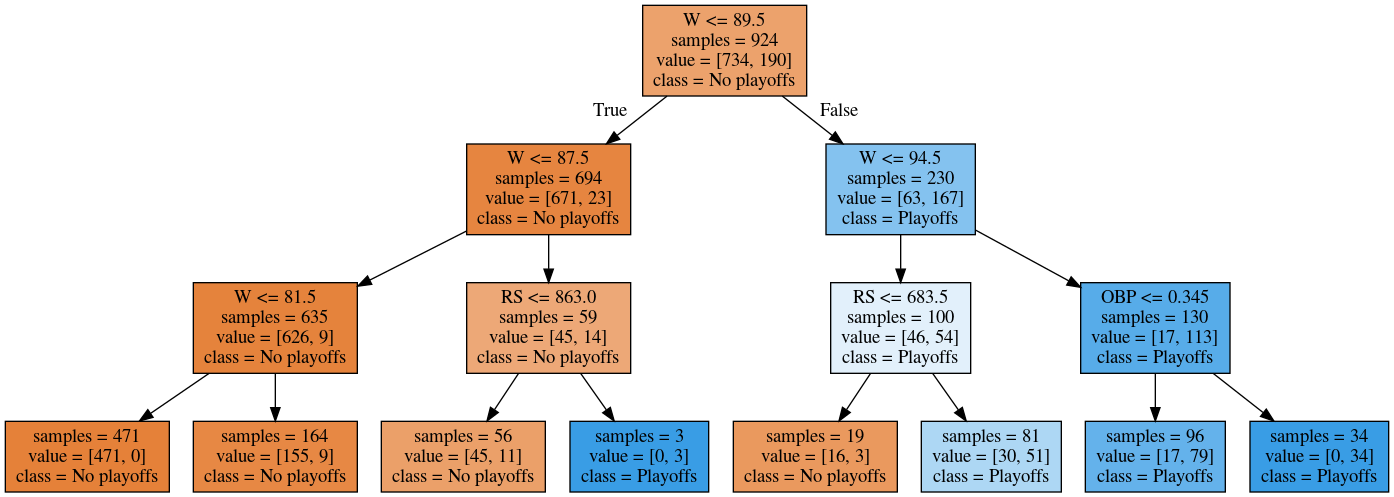

In [26]:
from IPython.display import Image
Image(filename='./output/simple_tree.png') 

# Modelo de Aprendizaje Random Forest

In [27]:
cols_to_use = ["Team", "RS", "RA", "W", "OBP", "SLG", "BA", "Playoffs"]

In [28]:
data = data_baseball[cols_to_use]

In [29]:
features = data[["RS", "RA", "W", "OBP", "SLG", "BA"]]

In [30]:
labels = data["Playoffs"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [34]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [35]:
y_predict = RandomForestModel.predict(X_test)

In [36]:
accuracy_score(y_test,y_predict)

0.9025974025974026

In [37]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='./output/complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['No Playoffs','Playoffs'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', './output/complete_tree.dot', '-o', './output/complete_tree.png'])

0

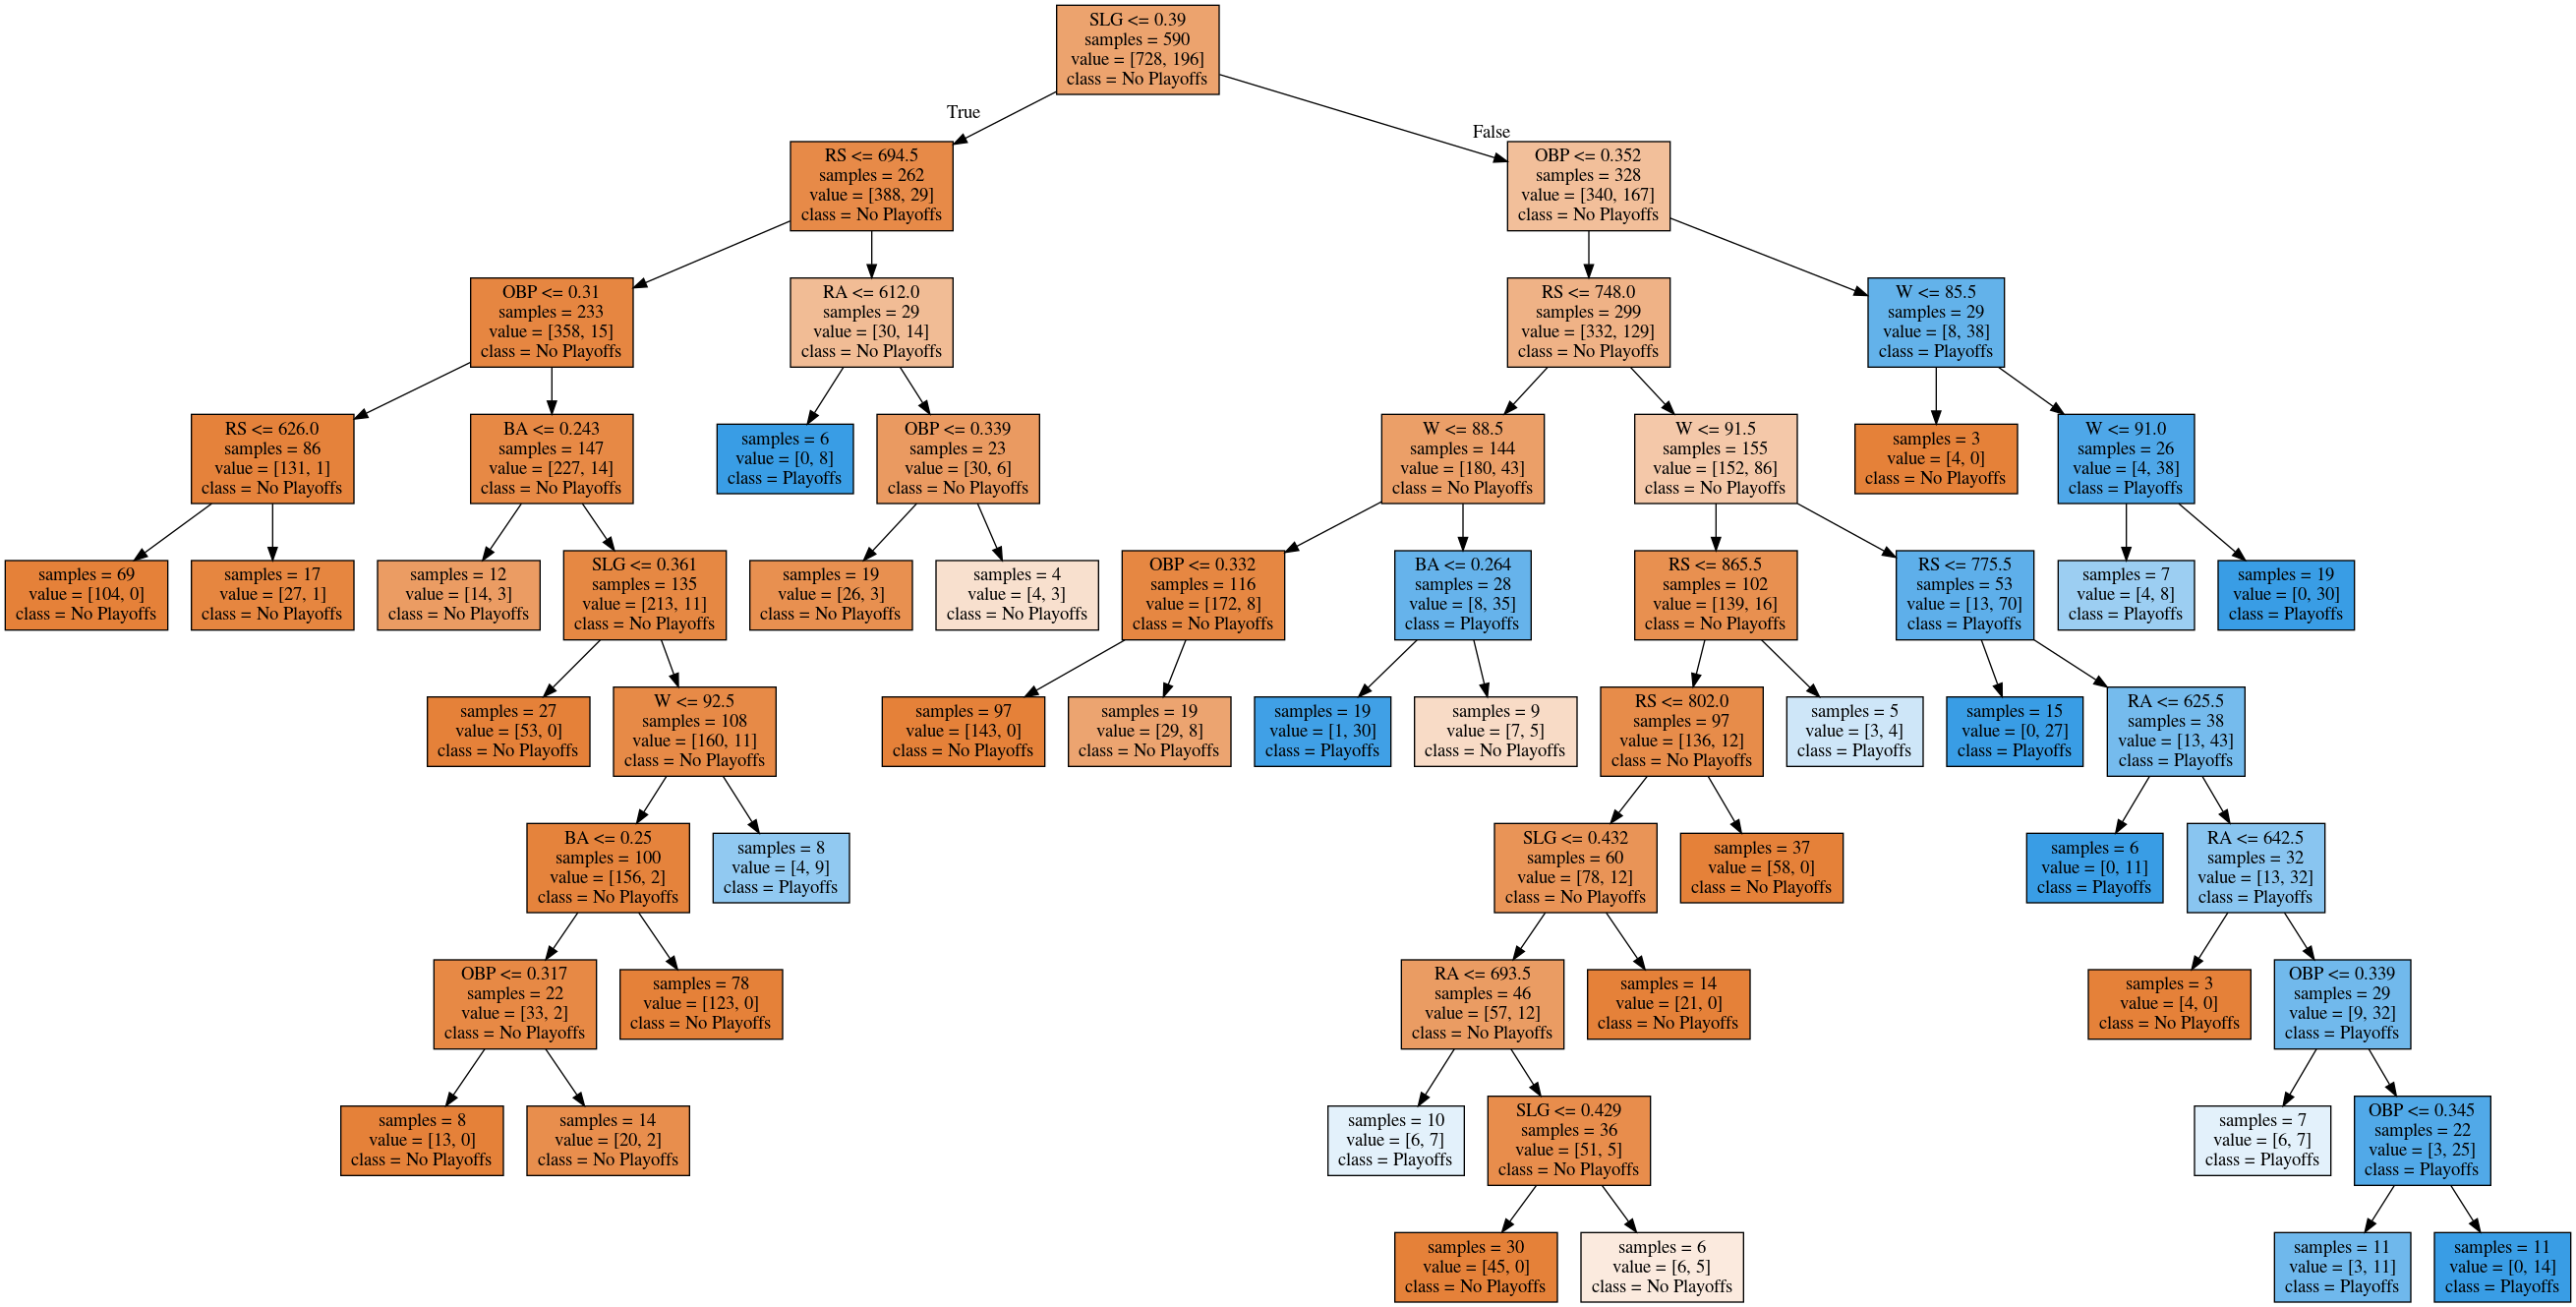

In [38]:
from IPython.display import Image
Image(filename='./output/complete_tree.png') 

In [39]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [40]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [42]:
importances.head(9)

,importance
feature,
W,0.590992
RA,0.122389
RS,0.117949
OBP,0.083561
SLG,0.053155
BA,0.031955


In [43]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

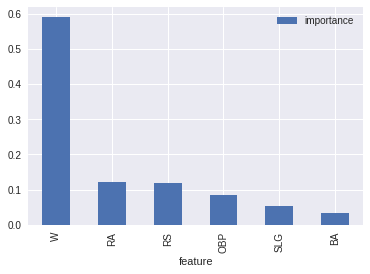

In [44]:
importances.plot.bar()